# Assignment #2 - Classification

<font color="blue"> Nishita Kalyanpur </font><br>
<font color="blue"> 801076677 </font>

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$

# I. Introduction

The objective of this assignment is to classify the data using algorithms such as Pocket, QDA, LDA and Logestic Regression. Classification is categorizing the data into their respective classes. Through classification, in which category the new data belongs, can be analysed. For this purpose, training dataset is used to train the model. Then its the model's job to categorize the new data it obtains.  Using visualization, one can notice how the data is distributed among these classes. For  this purpose a labeled data is chosen where each row has a label given to it. In this assignment, the label assigned is the class and by the graphs and plots, the data belonging to the different categories are observed. As the algorithms mentioned above works best for the binary classification based dataset, the respective data was selected. The data is trained and predictions are made and the plot is visualized with the target test values and the predicted values. The accuracy is calculated for each of the algorithms.

# II. Data

### Source Index

The data comes from the UCI Machine Learning repository

Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing
        
### Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### Data Attributes

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Reading the data

In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank-full.csv", sep=';', header=None,low_memory=False,skiprows=[0])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [683]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [684]:
np.any(df.isnull())

False

In [685]:
df.shape

(45211, 17)

In [686]:
df.size

768587

In [687]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [688]:
df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

# Preprocessing the data

In [689]:
df.columns =['age','job','marital_status','education','default_credit','yearly_balance','housing_loan',
             'personal_loan','contact','last_contact_day','last_contact_mth','last_contact_duration'
             ,'num_of_campaign','past_days','prev_num_contacts','poutcome','subscribed']

df

,age,job,marital_status,education,default_credit,yearly_balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_mth,last_contact_duration,num_of_campaign,past_days,prev_num_contacts,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [690]:
df.describe()

,age,yearly_balance,last_contact_day,last_contact_duration,num_of_campaign,past_days,prev_num_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [691]:
df['job']=df['job'].replace('blue-collar', 'bc', regex=True)
df['job']=df['job'].replace('admin.', 'ADMIN', regex=True)
df['job']=df['job'].replace('self-employed', 'selfem', regex=True)

df

,age,job,marital_status,education,default_credit,yearly_balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_mth,last_contact_duration,num_of_campaign,past_days,prev_num_contacts,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,bc,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [692]:

df['job1']=df.job.map(dict(management=1,technician=2,entrepreneur=3,bc=4,unknown=0,retired=5,ADMIN=6
                           ,services=7,selfem=8,unemployed=9,housemaid=10,student=11))



df['marital_status1']=df.marital_status.map(dict(married=1,single=0,divorced=2))



df['education1']=df.education.map(dict(tertiary=3,secondary=2,unknown=0,primary=1))



df['default_credit1']=df.default_credit.map(dict(no=0,yes=1))


df['housing_loan1']=df.housing_loan.map(dict(no=0,yes=1))


df['personal_loan1']=df.personal_loan.map(dict(no=0,yes=1))



df['subscribed1']=df.subscribed.map(dict(no=0,yes=1
))


df['last_contact_mth1']=df.last_contact_mth.map(dict(may=5,jun=6,jul=7,aug=8,oct=10,nov=11,dec=12,jan=1,feb=2,mar=3,
                                                     apr=4,sep=9))



df['poutcome1']=df.poutcome.map(dict(unknown=3,failure=0,other=2,success=1))


df['contact1']=df.contact.map(dict(unknown=0,cellular=1,telephone=2))


In [693]:
df.isnull().any()

age                      False
job                      False
marital_status           False
education                False
default_credit           False
yearly_balance           False
housing_loan             False
personal_loan            False
contact                  False
last_contact_day         False
last_contact_mth         False
last_contact_duration    False
num_of_campaign          False
past_days                False
prev_num_contacts        False
poutcome                 False
subscribed               False
job1                     False
marital_status1          False
education1               False
default_credit1          False
housing_loan1            False
personal_loan1           False
subscribed1              False
last_contact_mth1        False
poutcome1                False
contact1                 False
dtype: bool

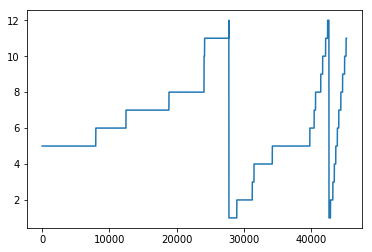

In [694]:
plt.plot(df.loc[:, 'last_contact_mth1'])

Activity of different classes based on their integer positions.

In [695]:
T = df.loc[:, 'subscribed'].copy()
T

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
45181     no
45182    yes
45183     no
45184     no
45185    yes
45186     no
45187    yes
45188    yes
45189     no
45190    yes
45191    yes
45192    yes
45193    yes
45194     no
45195    yes
45196    yes
45197    yes
45198     no
45199     no
45200    yes
45201    yes
45202    yes
45203    yes
45204    yes
45205    yes
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: subscribed, Length: 45211, dtype: object

In [696]:
X = df.iloc[:, :-1].copy()
X

,age,job,marital_status,education,default_credit,yearly_balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_mth,last_contact_duration,num_of_campaign,past_days,prev_num_contacts,poutcome,subscribed,job1,marital_status1,education1,default_credit1,housing_loan1,personal_loan1,subscribed1,last_contact_mth1,poutcome1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,1,3,0,1,0,0,5,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,0,2,0,1,0,0,5,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,3,1,2,0,1,1,0,5,3
3,47,bc,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4,1,0,0,1,0,0,5,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0,0,0,0,0,5,3
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1,1,3,0,1,0,0,5,3
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,1,0,3,0,1,1,0,5,3
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,3,2,3,1,1,0,0,5,3
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,5,1,1,0,1,0,0,5,3
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,2,0,2,0,1,0,0,5,3


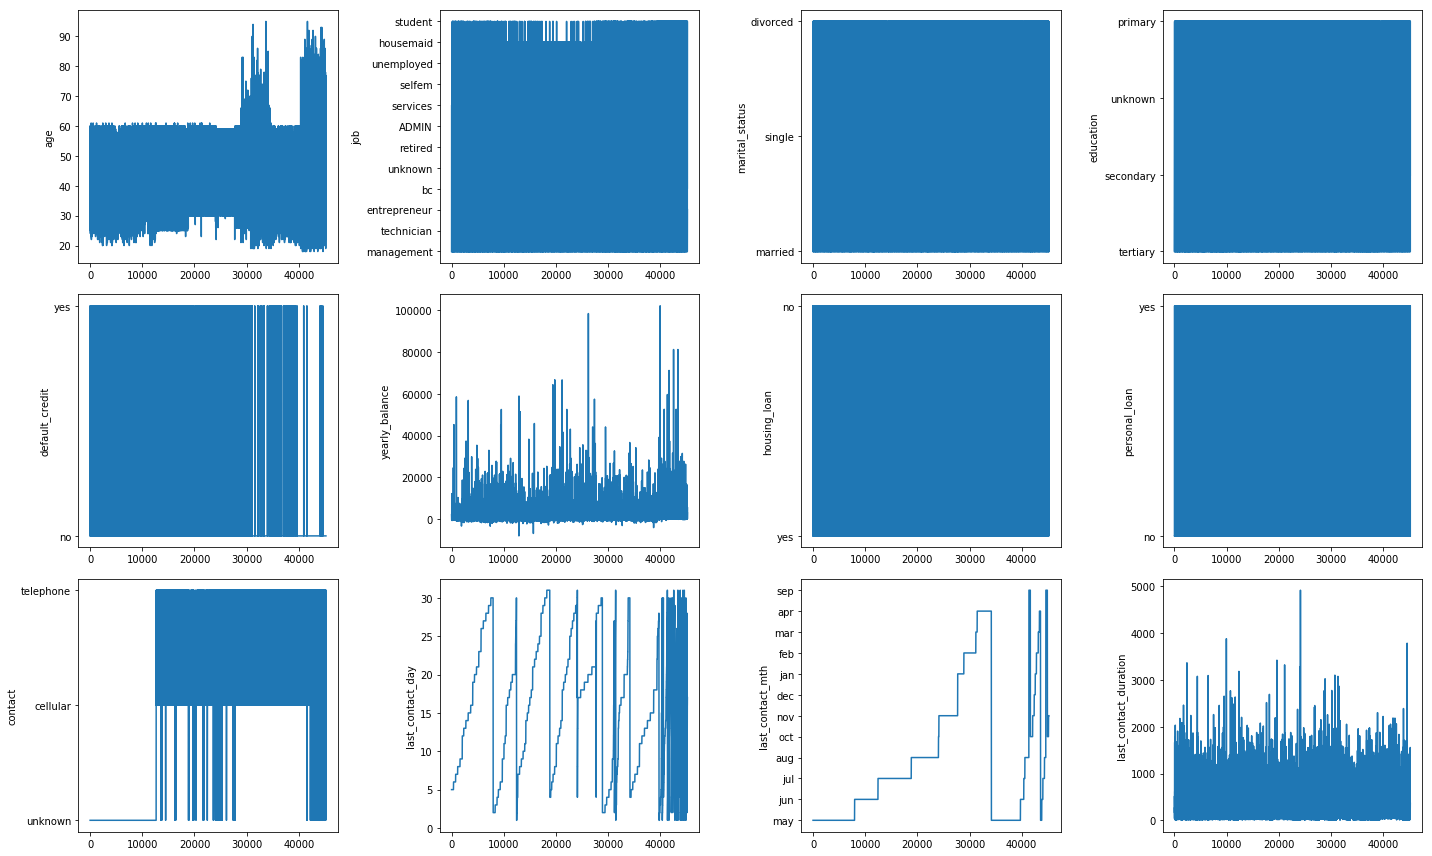

In [697]:
fig = plt.figure(figsize=(20,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

Represents a group of rows and columns by their integer positions.

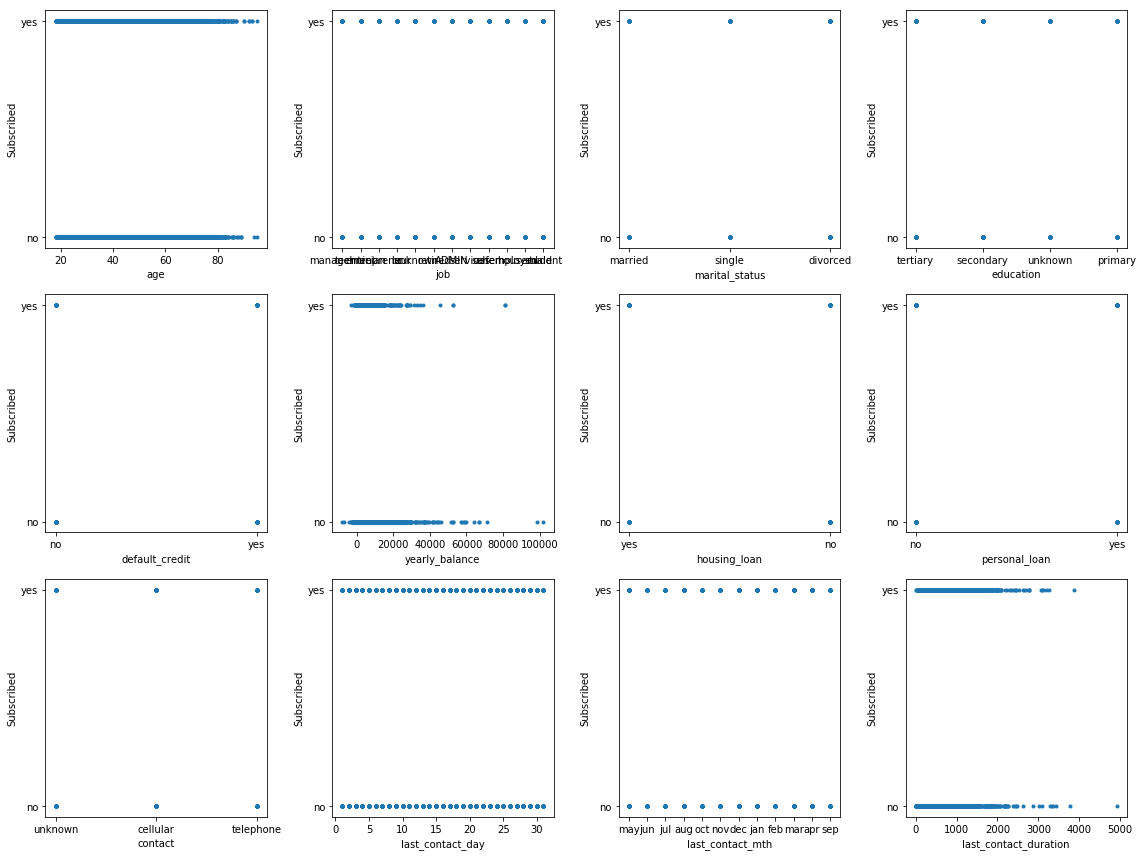

In [698]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Subscribed')
fig.tight_layout()

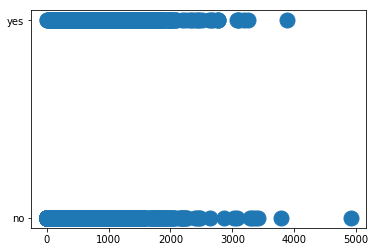

In [699]:
def f(t):
    'A damped exponential'
    s1 = np.cos(2 * np.pi * t)
    e1 = np.exp(-t)
    return s1 * e1


l = plt.plot(X.iloc[:, i], T, '.')
plt.setp(l, markersize=30)
plt.setp(l, markerfacecolor='C0')

plt.show()

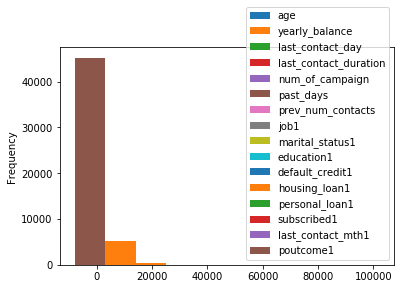

In [700]:
X.plot.hist()

Text(0.5, 1.0, 'Marital Status Vs Term Deposit Subcribed Numbers')

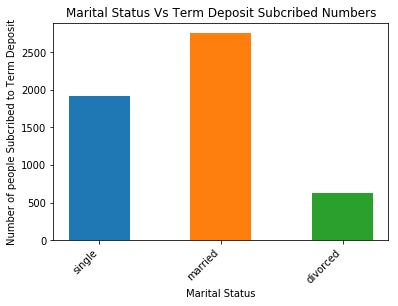

In [701]:
group = df.groupby(['marital_status1'])
LABELS = ["single","married","divorced"]

data=group['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('marital_status1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Marital Status')
plt.title('Marital Status Vs Term Deposit Subcribed Numbers')

From this plot it can be obeserved that more numeber of married people prefer term deposit followed by people who are single and then followed by divoced people.

Text(0.5, 1.0, 'Jobs Vs Term Deposit Subcribed Numbers')

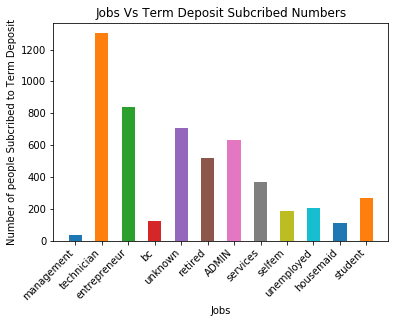

In [725]:
group = df.groupby(['job1'])
LABELS = ["management","technician","entrepreneur","bc","unknown","retired","ADMIN","services","selfem","unemployed","housemaid","student"]

data=group['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('job1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Jobs')
plt.title('Jobs Vs Term Deposit Subcribed Numbers')

From the plot,observations of the people belonging to the a particular job and their relation to subscribing to the term deposit are made. The technicians are more active on getting the term deposit compared to other people with different job profiles

# Preliminary Observation

From the plots, it can be seen that the term deposit marketing works very well with Entrepreneurs and Technician jobs. It works the least for the self employed, students,housemaids and unemployed.

From the very first plot, it can be observed that the subscribers spikes rises between the age of 30-60 and gradually decrease with increase in the age. Also there are a lower number of subscription for ages below 25.
It can also be noticed that the last month to contact is higher on April compared to other months.
People usually prefer to contact via cellular or telephone medium rather than the unknown category.


In [703]:
df['past_days']=df['past_days'].replace(-1, 0)
df['subscribed']=df['subscribed'].replace('no', -1)
df['subscribed']=df['subscribed'].replace('yes', 1)

In [704]:
X.values

array([[58, 'management', 'married', ..., 0, 5, 3],
       [44, 'technician', 'single', ..., 0, 5, 3],
       [33, 'entrepreneur', 'married', ..., 0, 5, 3],
       ...,
       [72, 'retired', 'married', ..., 1, 11, 1],
       [57, 'bc', 'married', ..., 0, 11, 3],
       [37, 'entrepreneur', 'married', ..., 0, 11, 2]], dtype=object)

In [705]:
normalized_age=(df['age']-df['age'].mean())/df['age'].std()
normalized_age

0        1.606947
1        0.288526
2       -0.747376
3        0.571045
4       -0.747376
5       -0.559030
6       -1.218241
7        0.100180
8        1.606947
9        0.194353
10       0.006007
11      -1.124068
12       1.136083
13       1.606947
14       1.512774
15       0.947737
16       0.382699
17       1.512774
18       1.795293
19      -0.747376
20      -1.218241
21       1.418601
22      -0.841549
23      -1.500760
24      -0.088166
25       0.288526
26      -0.182339
27       1.041910
28       0.476872
29      -0.464857
           ...   
45181    0.476872
45182   -0.653203
45183    2.737022
45184    2.077812
45185    1.795293
45186    1.701120
45187   -0.841549
45188   -1.124068
45189   -1.500760
45190   -0.841549
45191    3.207887
45192   -1.124068
45193   -1.218241
45194    1.701120
45195    2.548677
45196   -1.500760
45197   -0.464857
45198   -0.370684
45199   -0.653203
45200   -0.276512
45201    1.136083
45202   -0.653203
45203   -1.689106
45204    3.019541
45205   -1

In [706]:
normalized_age=(df['age']-df['age'].mean())/df['age'].std()
normalized_yearly_balance=(df['yearly_balance']-df['yearly_balance'].mean())/df['yearly_balance'].std()
normalized_last_contact_duration=(df['last_contact_duration']-df['last_contact_duration'].mean())/df['last_contact_duration'].std()
normalized_num_of_campaign=(df['num_of_campaign']-df['num_of_campaign'].mean())/df['num_of_campaign'].std()
normalized_prev_num_contacts=(df['prev_num_contacts']-df['prev_num_contacts'].mean())/df['prev_num_contacts'].std()
normalized_past_days=(df['past_days']-df['past_days'].mean())/df['past_days'].std()

Xnor = pd.concat([normalized_age,
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        normalized_yearly_balance,
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        normalized_last_contact_duration  ,
        normalized_num_of_campaign  ,
        normalized_past_days  ,
        normalized_prev_num_contacts ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        df['subscribed']],
       axis=1)
pd.set_option('display.max_columns',500)

X = pd.concat([df['age'],
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        df['yearly_balance'],
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        df['last_contact_duration']  ,
        df['num_of_campaign']  ,
        df['past_days']  ,
        df['prev_num_contacts'] ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        df['subscribed']],
       axis=1)
pd.set_option('display.max_columns',500)

X.values

array([[58,  0,  0, ...,  0,  1, -1],
       [44,  0,  0, ...,  0,  1, -1],
       [33,  0,  0, ...,  0,  1, -1],
       ...,
       [72,  0,  0, ...,  1,  0,  1],
       [57,  0,  1, ...,  0,  1, -1],
       [37,  0,  0, ...,  0,  0, -1]], dtype=int64)

(5289, 36)
(39922, 36)


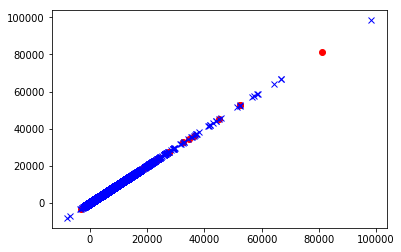

In [707]:
X_val=X.values

C1=X_val[np.where(X_val[:,35] == 1)]
C2=X_val[np.where(X_val[:,35] == -1)]
print(C1.shape)
print(C2.shape)

plt.plot(C1[:4231,:35], C1[:4231,:35], 'or')
plt.plot(C2[:31937,:35], C2[:31937,:35], 'xb')

T=df['subscribed']

In [708]:
Xtrain_p, Xtest_p,Ttrain_p,Ttest_p = C1[:4231,:35], C1[4231:,:35], C1[:4231,35:], C1[4231:,35:]
Xtrain_n, Xtest_n,Ttrain_n,Ttest_n = C2[:31937,:35], C2[31937:,:35], C2[:31937,35:], C2[31937:,35:]

X_all=X.iloc[:,:35]

# III. Method

# Summary of Classification Models

The purpose that the Classification model serves is to predict the values based on the observed values. The target values are usually the class labels. A classification model attempts to draw some conclusion from observed values. Given one or more inputs, a classification model will try to predict the value of one or more outcomes. Outcomes are labels that can be applied to a dataset. A training dataset is fed into the classification algorithm. Then the test data sample is compared with that to determine the classes it belongs to.

## Pocket Algorithm:

The pocket algorithm is an extension of the perceptron algorithm, in which the pocket algorithm stores the best solution of w to predict Y. It considers a simple binary classifcation as the target problem. For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification.The perceptron algorithm uses the learning rate alpha and the target value to adjust the value of w. But the perceptron algorithm does not guarantee to converge if the data is not linearly separable and the selected decision boundary may not be the best. To overcome the above limitation of perceptron algorithm, pocket algorithm is usually used.Thus, $\wv_{pocket}$ will contain the best solution so far.

## Discriminant Analysis:

The objective of discriminant analysis is to develop discriminant functions that are nothing but the linear combination of independent variables that will discriminate between the categories of the dependent variable in a perfect manner. It is a statistical tool with an objective to assess the adequacy of a classification.

### 1. Quadratic Discriminant Analysis (QDA) 

Quadratic Discriminant Analysis uses different covariance matrix for each class to calculate the discriminant function δk(x). 
Here, we use a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 
The decision boundary is placed where the discriminant functions meet such as δ1==δ2.Since the δk function is quadratic in x , We call this approach as Quadratic Discriminant Analysis (QDA).

### 2. Linear Discriminant Analysis (LDA)

Maintaining the covariance matrix is not cheap. Considering the input dimension $d$, the symmetric covariance metric contains $\frac{d (d+1)}{2}$. 

As the data is undersampled, the resulting class boundary has high chance of overfitting. 

Simply using the same covariance for all the classes, we can reach the **linear discriminant analysis** model, which can overcome the stated problems above.
The particularity of LDA is that it models the distribution of predictors separately in each of the response classes, and then it uses Bayes’ theorem to estimate the probability.

## Logistic Regression

We consider a linear regression model that directly predicts $P(T=k \mid \xv)$, not the class label $k$. 
This approach is called as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus,

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$


Since $P(T=k \mid \xv)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 
This function is called as **softmax function**. This generalizes the logistic sigmoid function and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$


# Implementation of the code

The data is partitioned in the ratio of 80:20 for training and testing data samples. The data is also partitiones based on positively classified labels and negatively classified labels.

The Classifier class has an abstract methods ‘train’ and ‘use’ which is used by all models. The Classifier class also provides a ‘normalize’ and ‘add_ones’ function for the models to normalize data and to add bias.

In the Pocket class, the train method takes the input data and trains them while calculating the corresponding $\wv$ value. It stores the initial $\wv$ value and the ones calculated later is compared to the one stored to see which one makes a better solution and the respective $\wv$ is stored in the w_pocket. This w_pocket value is used by the use method to calculate the predicted output y.

In the QDA class, the train method takes in the Xp and Xn which are the training data set of different classes (in our case, 'yes' and 'no' are the class label given which is converted to (+1,-1)) and computes two different values of sigma , mu , prior. It also implements a QDA method which calculates the two discriminant function δk(x). In the use method, we compare the δk(x) values to classify the output into respective class labels.

The LDA class implementation is similar to the QDA implementation except for the fact that the LDA will use the same sigma covariance matrix to calculate the the two discriminant function δk(x).The LDA class has a separate LDA method to calculate the discriminant function δk(x). In the use method, we compare the δk(x) values to classify the output into respective class labels.

In the Logistic Regression class, apart from the train and use method it also uses the SoftMax function which gives the probability distribution of the class labels. The train method calculates the value of w using gradient decent method with learning rate alpha and the probability distribution of the class labels. The use method uses the w with test data to give the predicted output Y.



In [709]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [710]:
Xlst, Tlst = partition(pd.DataFrame(X_all), pd.DataFrame(T))

In [711]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]
 

C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [712]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

In [713]:
from copy import deepcopy as copy 
alpha = 0.01 

In [714]:
class Pocket(Classifier): 
    """ 
        Pocket class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        Classifier.__init__(self)
        self.alpha = alpha
    
        
    def compare(self, X, T, w, wp):
#         print("X",X.shape)
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
        
    def train(self, X, T):
        X = self.normalize(X)
        X = self.add_ones(X)
       
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)

        for i in range(X.shape[0]):

            converged = True
            for k in np.random.permutation(X.shape[0]): 
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X[k], T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break

            print("End of training: ", i)
            return self.w_pocket
    
    def use(self, X):
        X = self.normalize(X)
        X = self.add_ones(X)         
        y = X @ self.w_pocket

        return y

End of training:  0


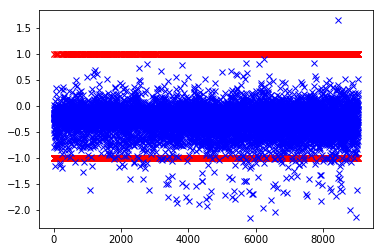

In [715]:
pkt=Pocket()
pkt.train(Xtrain,Ttrain) 
Y = pkt.use(Xtest)

plt.plot(Ttest,'xr')
plt.plot(Y,'xb')


In [716]:

def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [717]:
Y = np.sign(Y)
matrix = confusion_matrix(Y, Ttest)
matrix

,-1,1
-1,50310738,23227848
1,5623074,2596104


In [718]:
Ytrain = pkt.use(Xtrain)

In [719]:
ac = np.diag(matrix) / np.sum(matrix)
print("Accuracy:",ac[-1]*100,"%")

Accuracy: 89.94691439946915 %


In [724]:
TP=50094228
TN=23127888
FN=5839584
FP=2696064
Accuracy=((TP+TN)/(TP+FP+TN+FN))*100
print("Test Accuracy: ",Accuracy , "%")
print("----------------------------")
Precision = (TP/(TP+FP))
print("Precision: ",Precision)
recall=(TP/(TP+FN))
print("Recall: ",recall)
F1=(2*(Precision*recall))/(Precision+recall)
print("F1 score",F1)
Specificity=(TN/(TN+FP))
print("Specificity: ",Specificity)
MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC: ",MCC)

Test Accuracy:  89.55983189559832 %
--------------------------
Precision:  0.9489287916801067
Recall:  0.8955983189559832
F1 score 0.9214925882488763
Specificity:  0.8955983189559832
MCC:  0.7689545395663591


In [726]:
class QDAclass(Classifier): 
    """ 
        QDA class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        Classifier.__init__(self)
        
    def QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)

        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)
        
    def train(self, Xp, Xn):
        N1 = Xp.shape[0]
        N2 = Xn.shape[0]
        N = N1 + N2
        X = np.vstack((Xp, Xn))
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)

        self.Sigma1 = np.cov(Xs[:N1].T)
        self.Sigma2 = np.cov(Xs[N1:].T)

        self.prior1 = N1 / N
        self.prior2 = N2 / N

    def use(self, Xtest):

        XtestS = self.normalize(Xtest)

        self.d1 = self.QDA(XtestS, self.mu1, self.Sigma1, self.prior1)
        self.d2 = self.QDA(XtestS, self.mu2, self.Sigma2, self.prior2)
        y=np.sign(self.d1-self.d2).astype(int)
        return y

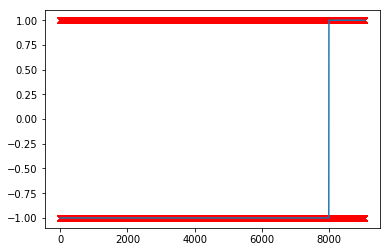

In [727]:
qda = QDAclass()
qda.train(Xtrain_p,Xtrain_n)
Xtest1 = np.vstack((Xtest_p, Xtest_n))
Y = qda.use(Xtest1)
test=np.vstack((Ttest_n, Ttest_p))
plt.plot(Y,'xr')
plt.plot(test)

In [649]:
Y = np.sign(Y)
matrix = confusion_matrix(Y, test1)
matrix

,-1,1
-1,36675105,4859394
1,35533250,4708100


In [650]:
ac = np.diag(matrix) / np.sum(matrix)
ac
print("Accuracy:",ac[1]*100,"%")

Accuracy: 49.20933318588963 %


In [651]:
TP=36675105
TN=4859394
FN=35533250
FP=4708100
Accuracy=((TP+TN)/(TP+FP+TN+FN))*100
print("Test Accuracy: ",Accuracy , "%")
print("--------------------------")
Precision = (TP/(TP+FP))
print("Precision: ",Precision)
recall=(TP/(TP+FN))
print("Recall: ",recall)
F1=(2*(Precision*recall))/(Precision+recall)
print("F1 score",F1)
Specificity=(TN/(TN+FP))
print("Specificity: ",Specificity)
MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC: ",MCC)

Test Accuracy:  50.79066681411037 %
--------------------------
Precision:  0.8862316246409624
Recall:  0.5079066681411036
F1 score 0.6457364437991696
Specificity:  0.5079066681411036
MCC:  0.01016607078711526


In [652]:
class LDAclass(Classifier): 
    """ 
        LDA class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        Classifier.__init__(self)
        self.alpha = alpha
    
        
    def LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                    - 0.5 * np.dot(mu, sigma_inv) * mu \
                    + np.log(prior), axis=1)
        
    def train(self, Xp, Xn):
        N1 = Xp.shape[0]
        N2 = Xn.shape[0]
        N = N1 + N2
        X = np.vstack((Xp, Xn))
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)

        self.sigma = np.cov(Xs.T)

        self.prior1 = N1 / N
        self.prior2 = N2 / N
    
    def use(self, X):
        X = self.normalize(X)
        d1 = self.LDA(X, self.mu1, self.sigma, self.prior1)
        d2 = self.LDA(X, self.mu2, self.sigma, self.prior2)
        y=np.sign(d1-d2).astype(int)
        return y

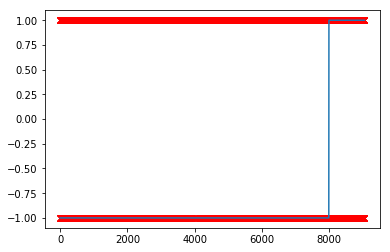

In [653]:
lda = LDAclass()
lda.train(Xtrain_p,Xtrain_n)
Xtest2 = np.vstack((Xtest_p, Xtest_n))
Y = lda.use(Xtest2)
test1=np.vstack((Ttest_n, Ttest_p))
plt.plot(Y,'xr')
plt.plot(test1)

In [654]:
Y = np.sign(Y)
matrix = confusion_matrix(Y, test1)
matrix

,-1,1
-1,18836615,2495822
1,53371740,7071672


In [655]:
ac = np.diag(matrix) / np.sum(matrix)
print("Accuracy:",ac[-1]*100,"%")

Accuracy: 26.08647572708172 %


In [656]:
TP=18836615
TN=2495822
FN=53371740
FP=7071672
Accuracy=((TP+TN)/(TP+FP+TN+FN))*100
print("Test Accuracy: ",Accuracy , "%")
print("--------------------------")
Precision = (TP/(TP+FP))
print("Precision: ",Precision)
recall=(TP/(TP+FN))
print("Recall: ",recall)
F1=(2*(Precision*recall))/(Precision+recall)
print("F1 score",F1)
Specificity=(TN/(TN+FP))
print("Specificity: ",Specificity)
MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC: ",MCC)

Test Accuracy:  26.08647572708172 %
--------------------------
Precision:  0.7270498045663922
Recall:  0.2608647572708172
F1 score 0.3839637112733638
Specificity:  0.2608647572708172
MCC:  -0.33042066156874134


In [657]:
class LogisticRegression(Classifier): 
    """ 
        LogisticRegression class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        Classifier.__init__(self)
        self.mean=None
        self.stds=None
        self.w=None
        self.alpha = 0.001
        
# g(.) the softmax function
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

# for linear fx
    def g(self, X, w):
        return self.softmax(X @ w) 

    def train(self, Xn, Xp):
        K = 2
        D = Xn.shape[1]
        Xtrain = np.vstack((Xn, Xp))
        N1 = Xn.shape[0]
        N2 = Xn.shape[0]
        N = Xtrain.shape[0]
        self.means, self.stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        Xs = (Xtrain - self.means) / self.stds
        Ttrain = np.zeros((N, 2))
        Ttrain[:N1, 0] = 1
        Ttrain[N1:, 1] = 1
        self.w = np.random.rand(D+1, K)
        maxiter = 1000
        Xs = self.add_ones(Xs)
        for step in range(maxiter):
            ys = self.g(Xs, self.w)
            self.w += self.alpha * Xs.T @ (Ttrain - ys)
    
    def use(self, X):
        X = self.normalize(X)
        X = self.add_ones(X)
        Y = self.g(X, self.w)
        return Y

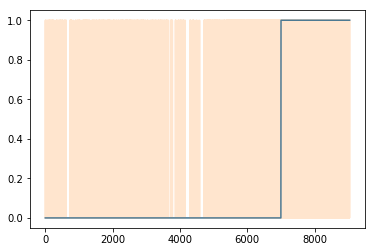

In [658]:
logistic = LogisticRegression()
logistic.train(Xtrain_n,Xtrain_p)
Xtest3 = np.vstack((Xtest_n, Xtest_p))
Y = logistic.use(Xtest3)
Ttest = np.zeros((9043, 2))
Ttest[:7000, 0] = 1
Ttest[7000:, 1] = 1
Tl = np.argmax(Ttest, 1)
Yl = np.argmax(Y, 1)
plt.plot(Tl)
plt.plot(Yl,alpha=0.2)

In [659]:
Yt=logistic.use(np.vstack((Xtrain_n, Xtrain_p)))
Tt=np.vstack((Ttrain_n, Ttrain_p))
Y1train= np.argmax(Yt, 1)
Tltrain= np.argmax(Tt, 1)

In [660]:
Y = np.sign(Yl)
matrix = confusion_matrix(Y, Tl)
matrix

,0,1
0,6161,1201
1,839,842


In [662]:
TP=6161
TN=1201
FN=839
FP=842
Accuracy=((TP+TN)/(TP+FP+TN+FN))*100
print("Test Accuracy: ",Accuracy , "%")
print("Train Accuracy: ", 100 - np.mean(np.abs(Tltrain - Y1train)) * 100, "%")
print("--------------------------")
Precision = (TP/(TP+FP))
print("Precision: ",Precision)
recall=(TP/(TP+FN))
print("Recall: ",recall)
F1=(2*(Precision*recall))/(Precision+recall)
print("F1 score",F1)
Specificity=(TN/(TN+FP))
print("Specificity: ",Specificity)
MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC: ",MCC)

Test Accuracy:  81.41103616056618 %
Train Accuracy:  85.11391285113913 %
--------------------------
Precision:  0.8797658146508639
Recall:  0.8801428571428571
F1 score 0.8799542955081054
Specificity:  0.5878609887420461
MCC:  0.46824751193359865


# IV. Experiments

##  1. Discussion about evaluation metrics:

- **Accuracy**: It is the measure of correct predictions in the model.
$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$
​
- **Confusion Matrix**: It is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
​

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.
​
$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
​
- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 
​
$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
​
- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 
​
$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

- **F1 Score**: For convenience, many people want a single measure rather than multiple as above. For those, we can provide the harmonic mean of precision and recall. 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

- **MCC (Matthews Correlation Coefficient)**: MCC uses all the counts in confusion matrix for the metric. 

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$


## 2. Discussion about train and test accuracies:

The dataset is partitioned into training and testing part in the ratio of 80:20. For QDA and LDA, the input data is partitioned based on its classification labels('yes' or 'no' to '+1' and '-1'). As observed from the calculations,the Training accuracies are comparatively higher than the test accuracies as there are relatively more samples on the data.

For example, the training accuracy for the logistic regression algorithm is 85.11% while the test accuracy for logistic regression algorithm is 81.41%

## 3. Discussions about classificaion model comparison:

Comparing the results from different metrics from all models, the pocket algorithm turned out to perform the best with test accuracy of 89.55% and a F1 score of 0.92.

The next best model seems to be that of logistic regression, which has a test accuracy of 81.41% and F1 score of 0.87

Then of the discriminant analysis models, the QDA algorithm is performing better than LDA algorithm for this data set.

The test accuracy for the QDA algorithm 50.79% and F1 score of 0.64 and that of LDA is 26.08 with F1 score as 0.38.

# Conclusion

The Pocket algorithm seems to be working the best among all the other models used for classification for the binary classification dataset on bank marketing. Pocket algorithm had an accuracy of nearly 90% for test data. The main ultimatum of this project was to acheive the classification models and its analysis, which was successfully completed.

#### Challenges faced:

This assignment works best on the binary classification dataset with Pocket algorithm having a good accuracy followed by Logistic Regression, then come the QDA and at the end comes the LDA. It is a little bit of struggle to come across a good dataset with more numerical values. Had to preprocess a lot of things to make the data acceptable for the classification model.

It is important to replace the nagative parameters such as 'no' which are usually labeled as 0 to -1 as it is easy to differentiate and visualize that way.

# References

[1] Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. O'Reilly Media, 13 Mar. 2017,  shop.oreilly.com/product/0636920052289.do.

[2] UCI Machine Learning Repository: Bank Marketing Data Set, https://archive.ics.uci.edu/ml/datasets/bank+marketing